In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# load the data
data = pd.read_csv('/content/CarPricesPrediction.csv')

# feature engineering - we are creating a new variable Car_Age
data['Car_Age'] = 2026 - data['Year']

# selecting only relevant variables, droping the rest of them
data = data.drop(['Unnamed: 0', 'Model', 'Year'], axis=1)

# display first rows
data.head()

,Make,Mileage,Condition,Price,Car_Age
0,Ford,18107,Excellent,19094.75,4
1,Toyota,13578,Excellent,27321.10,12
2,Chevrolet,46054,Good,23697.30,10
3,Ford,34981,Excellent,18251.05,4
4,Chevrolet,63565,Excellent,19821.85,7


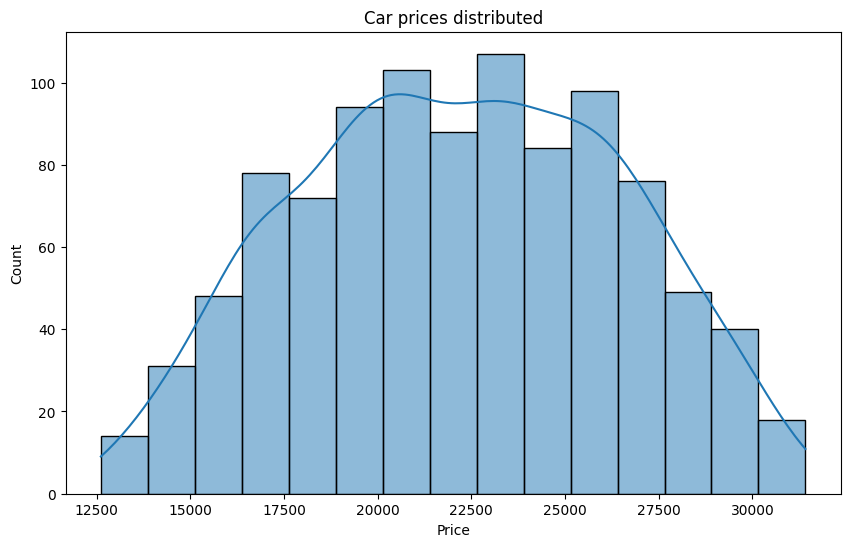

In [ ]:
#visualizing the distribution of the car prices
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True)
plt.title('Car prices distributed')
plt.show()

In [ ]:
# importing libraries
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

# converting nominal variables to numerical
data = pd.get_dummies(data, columns=['Make', 'Condition'])

# separating all features expect the labal variable in (X) and target - the label variable in (y)
X = data.drop('Price', axis=1)
y = data['Price']

In [ ]:
# split data into training and testing sets (used for the final graph)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize and Train the Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# cross-Validation (matching your 5-fold Altair setup)
cv_scores_lr = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_lr = np.sqrt(-cv_scores_lr.mean())

# make predictions on the test set for evaluation and plotting
y_pred_lr = lr_model.predict(X_test)

# calculate Metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# print results
print(f"Python Cross-Validated R=MSE: {cv_rmse_lr}")
print(f"Python Linear Regression MSE: {mse_lr}")
print(f"Python Linear Regression MAE: {mae_lr}")
print(f"Python Linear Regression R^2 Score: {r2_lr}")

Python Cross-Validated RMSE: 0.06535066396424719
Python Linear Regression MSE: 0.004753799308279597
Python Linear Regression MAE: 0.05994262472144328
Python Linear Regression R^2 Score: 0.999999999765397


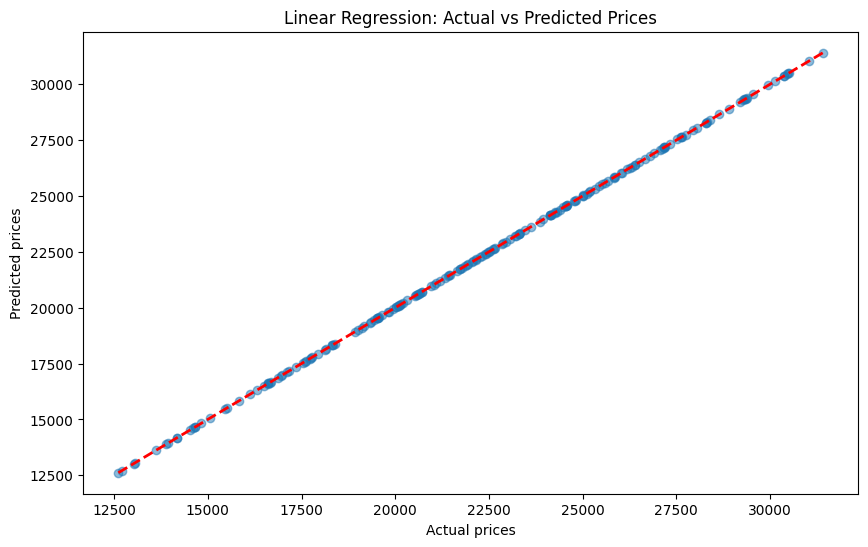

In [ ]:
# plot Actual vs Predicted Prices
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.show()

In [ ]:
# now we are starting with neural networks
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

# standardize the features (X)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# define the model architecture using the new standard
nn_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)), # Dedicated Input layer
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

In [ ]:
nn_model.compile(optimizer='adam', loss='mean_squared_error')
# train the model and store the history for plotting
history = nn_model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, verbose=0)

In [ ]:
# Make predictions and calculate scores
y_pred_nn = nn_model.predict(X_test_scaled)
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test, y_pred_nn)


print(f"Neural Network RMSE:     {rmse_nn}")
print(f"Neural Network MSE:      {mse_nn}")
print(f"Neural Network MAE:      {mae_nn}")
print(f"Neural Network R^2 Score: {r2_nn}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Neural Network RMSE:     10559.165802060445
Neural Network MSE:      111495982.4354028
Neural Network MAE:      10368.204239501953
Neural Network R^2 Score: -4.5023965779435


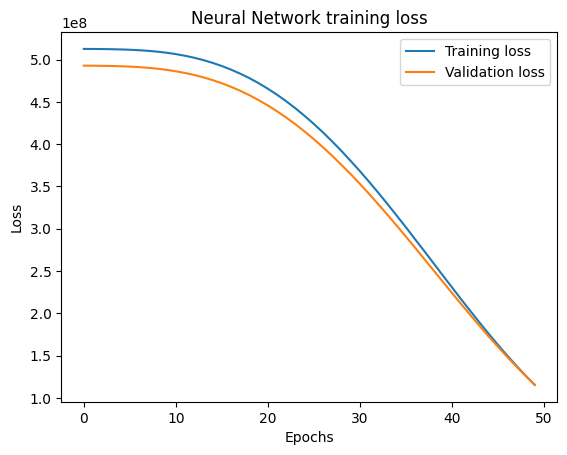

In [ ]:
#plot
#training loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Neural Network training loss')
plt.legend()
plt.show()

In [ ]:
print(f"Linear Regression Mean Squared Error: {mse_lr}")
print(f"Neural Network Mean Squared Error: {mse_nn}")

Linear Regression Mean Squared Error: 0.004753799308279597
Neural Network Mean Squared Error: 111495982.4354028


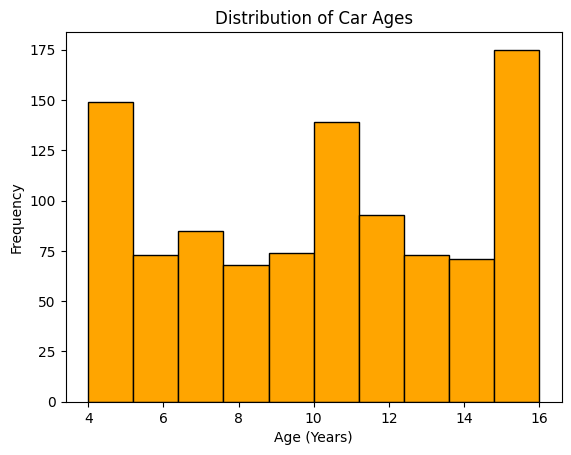

In [ ]:
plt.hist(data['Car_Age'], bins=10, color='orange', edgecolor='black')
plt.title('Distribution of Car Ages')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print(data.columns)

Index(['Mileage', 'Price', 'Car_Age', 'Make_Chevrolet', 'Make_Ford',
       'Make_Honda', 'Make_Nissan', 'Make_Toyota', 'Condition_Excellent',
       'Condition_Fair', 'Condition_Good'],
      dtype='object')


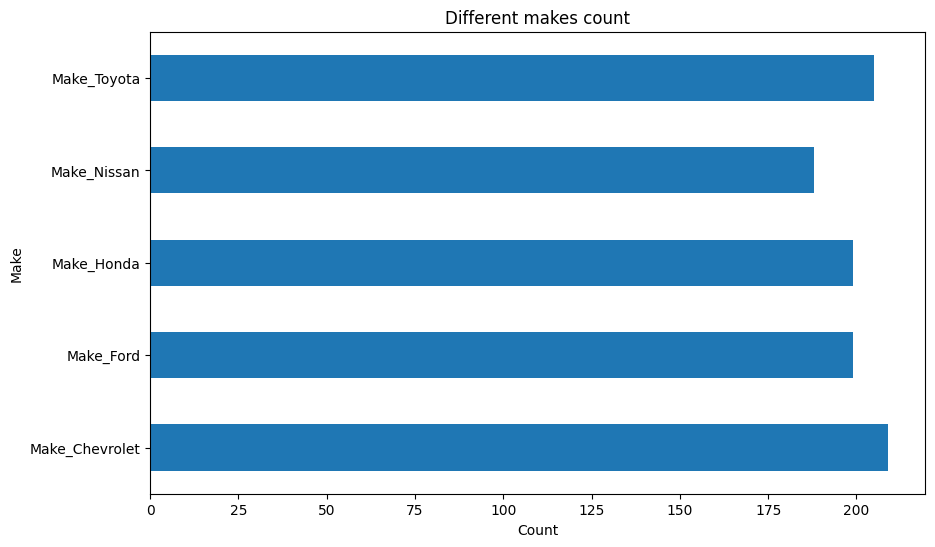

In [ ]:
make_counts = data[['Make_Chevrolet', 'Make_Ford', 'Make_Honda', 'Make_Nissan', 'Make_Toyota']].sum()
plt.figure(figsize=(10, 6))
make_counts.plot(kind='barh')
plt.title('Different makes count')
plt.xlabel('Count')
plt.ylabel('Make')
plt.show()

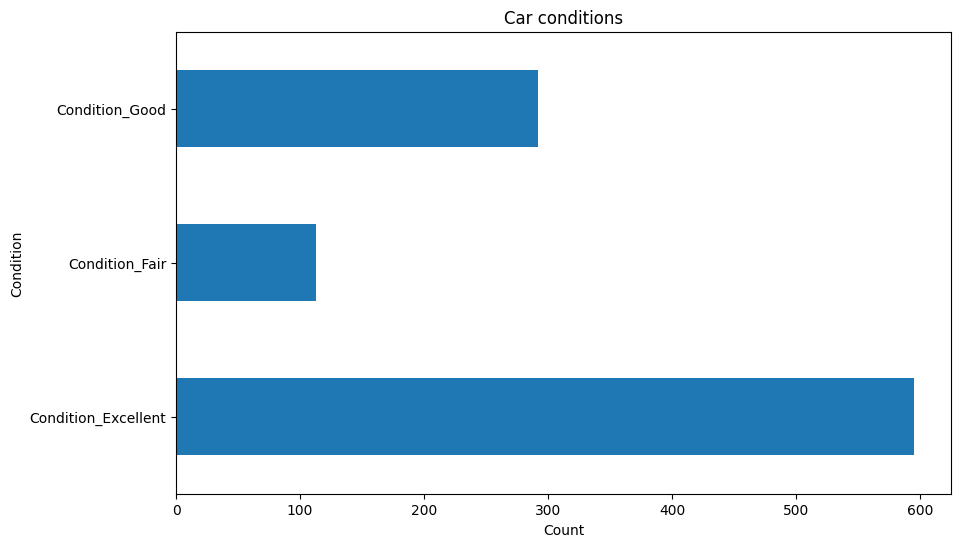

In [ ]:
condition_counts = data[['Condition_Excellent', 'Condition_Fair', 'Condition_Good']].sum()
plt.figure(figsize=(10, 6))
condition_counts.plot(kind='barh') # Use condition_counts here
plt.title('Car conditions')
plt.xlabel('Count')
plt.ylabel('Condition')
plt.show()